In [3]:
import torch

In [4]:
import torchvision

In [5]:
from torch.utils.data import Dataset,DataLoader

In [6]:
import numpy as np

In [7]:
import math

In [8]:
import pandas as pd

In [9]:
data = pd.read_csv('https://raw.githubusercontent.com/python-engineer/pytorchTutorial/master/data/wine/wine.csv')

In [10]:
data.to_csv('./wine.csv',index=False)

In [11]:
# class WineDataSet(Dataset):
#     def __init__(self,data,x,y):
#         xy = data
#         x = np.array(x)
#         y = np.array(y)
#         self.x = torch.from_numpy(x)
#         self.y = torch.from_numpy(y)
#         self.n_samples = xy.shape[0]
        
#     def __getitem__(self,index):
#         return self.x[index],self.y[index]
    
#     def __len__(self):
#         return self.n_samples

In [12]:
class WineDataSet(Dataset):
    def __init__(self):
        xy = np.loadtxt('./wine.csv',delimiter=',',dtype=np.float32,skiprows=1)
        print(xy.shape)
        self.x = torch.from_numpy(xy[:,1:])
        self.y = torch.from_numpy(xy[:,[0]])
        self.n_samples = xy.shape[0]
        
    def __getitem__(self,index):
        return self.x[index],self.y[index]
    
    def __len__(self):
        return self.n_samples

In [13]:
dataset = WineDataSet()

(178, 14)


In [14]:
first_data = dataset[0]

In [15]:
features,labels = first_data

In [16]:
print(features)

tensor([1.4230e+01, 1.7100e+00, 2.4300e+00, 1.5600e+01, 1.2700e+02, 2.8000e+00,
        3.0600e+00, 2.8000e-01, 2.2900e+00, 5.6400e+00, 1.0400e+00, 3.9200e+00,
        1.0650e+03])


In [17]:
print(labels)

tensor([1.])


In [18]:
dataloader = DataLoader(dataset,batch_size=32,shuffle=True,num_workers=2)

In [19]:
dataiter = iter(dataloader)

In [20]:
data = dataiter.next()

In [21]:
features,labels = data

In [22]:
features.shape

torch.Size([32, 13])

In [23]:
labels.shape

torch.Size([32, 1])

In [24]:
# dummy training loop

In [38]:
num_epochs = 2
total_samples = len(dataset)
n_iters = math.ceil(total_samples/32)

In [39]:
total_samples

178

In [40]:
n_iters

6

In [42]:
for epoxh in range(num_epochs):
    for i,(inputs,labels) in enumerate(dataloader):
        # forward backward, update
        print(f'epoch : {epoxh+1}/{num_epochs}, step : {i+1}/{n_iters}, inputs : {inputs.shape}, labels : {labels.shape}')

epoch : 1/2, step : 1/6, inputs : torch.Size([32, 13]), labels : torch.Size([32, 1])
epoch : 1/2, step : 2/6, inputs : torch.Size([32, 13]), labels : torch.Size([32, 1])
epoch : 1/2, step : 3/6, inputs : torch.Size([32, 13]), labels : torch.Size([32, 1])
epoch : 1/2, step : 4/6, inputs : torch.Size([32, 13]), labels : torch.Size([32, 1])
epoch : 1/2, step : 5/6, inputs : torch.Size([32, 13]), labels : torch.Size([32, 1])
epoch : 1/2, step : 6/6, inputs : torch.Size([18, 13]), labels : torch.Size([18, 1])
epoch : 2/2, step : 1/6, inputs : torch.Size([32, 13]), labels : torch.Size([32, 1])
epoch : 2/2, step : 2/6, inputs : torch.Size([32, 13]), labels : torch.Size([32, 1])
epoch : 2/2, step : 3/6, inputs : torch.Size([32, 13]), labels : torch.Size([32, 1])
epoch : 2/2, step : 4/6, inputs : torch.Size([32, 13]), labels : torch.Size([32, 1])
epoch : 2/2, step : 5/6, inputs : torch.Size([32, 13]), labels : torch.Size([32, 1])
epoch : 2/2, step : 6/6, inputs : torch.Size([18, 13]), labels : 

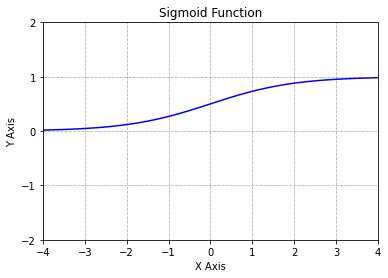

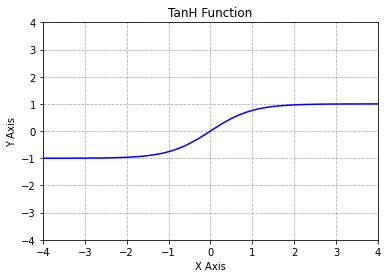

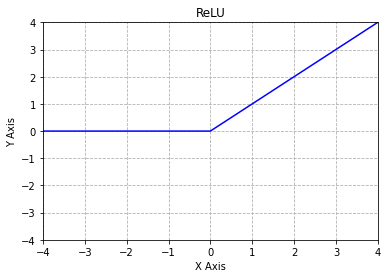

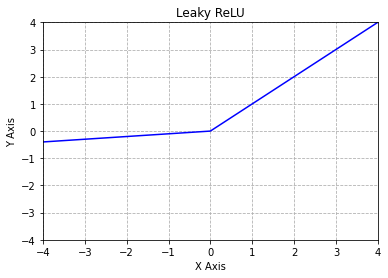

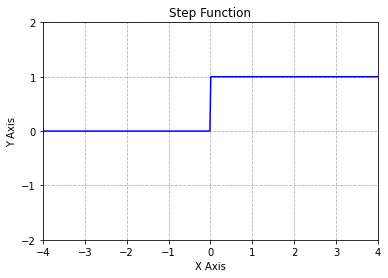

done


<Figure size 432x288 with 0 Axes>

In [46]:
import numpy as np 
import matplotlib.pyplot as plt

##### Sigmoid
sigmoid = lambda x: 1 / (1 + np.exp(-x))

x=np.linspace(-10,10,10)

y=np.linspace(-10,10,100)

fig = plt.figure()
plt.plot(y,sigmoid(y),'b', label='linspace(-10,10,100)')

plt.grid(linestyle='--')

plt.xlabel('X Axis')

plt.ylabel('Y Axis')

plt.title('Sigmoid Function')

plt.xticks([-4, -3, -2, -1, 0, 1, 2, 3, 4])
plt.yticks([-2, -1, 0, 1, 2])

plt.ylim(-2, 2)
plt.xlim(-4, 4)

plt.show()
#plt.savefig('sigmoid.png')

fig = plt.figure()

##### TanH
tanh = lambda x: 2*sigmoid(2*x)-1

x=np.linspace(-10,10,10)

y=np.linspace(-10,10,100)

plt.plot(y,tanh(y),'b', label='linspace(-10,10,100)')

plt.grid(linestyle='--')

plt.xlabel('X Axis')

plt.ylabel('Y Axis')

plt.title('TanH Function')

plt.xticks([-4, -3, -2, -1, 0, 1, 2, 3, 4])
plt.yticks([-4, -3, -2, -1, 0, 1, 2, 3, 4])

plt.ylim(-4, 4)
plt.xlim(-4, 4)

plt.show()
#plt.savefig('tanh.png')

fig = plt.figure()

##### ReLU
relu = lambda x: np.where(x>=0, x, 0)

x=np.linspace(-10,10,10)

y=np.linspace(-10,10,1000)

plt.plot(y,relu(y),'b', label='linspace(-10,10,100)')

plt.grid(linestyle='--')

plt.xlabel('X Axis')

plt.ylabel('Y Axis')

plt.title('ReLU')

plt.xticks([-4, -3, -2, -1, 0, 1, 2, 3, 4])
plt.yticks([-4, -3, -2, -1, 0, 1, 2, 3, 4])

plt.ylim(-4, 4)
plt.xlim(-4, 4)

plt.show()
#plt.savefig('relu.png')

fig = plt.figure()

##### Leaky ReLU
leakyrelu = lambda x: np.where(x>=0, x, 0.1*x)

x=np.linspace(-10,10,10)

y=np.linspace(-10,10,1000)

plt.plot(y,leakyrelu(y),'b', label='linspace(-10,10,100)')

plt.grid(linestyle='--')

plt.xlabel('X Axis')

plt.ylabel('Y Axis')

plt.title('Leaky ReLU')

plt.xticks([-4, -3, -2, -1, 0, 1, 2, 3, 4])
plt.yticks([-4, -3, -2, -1, 0, 1, 2, 3, 4])

plt.ylim(-4, 4)
plt.xlim(-4, 4)

plt.show()
#plt.savefig('lrelu.png')

fig = plt.figure()


##### Binary Step
bstep = lambda x: np.where(x>=0, 1, 0)

x=np.linspace(-10,10,10)

y=np.linspace(-10,10,1000)

plt.plot(y,bstep(y),'b', label='linspace(-10,10,100)')

plt.grid(linestyle='--')

plt.xlabel('X Axis')

plt.ylabel('Y Axis')

plt.title('Step Function')

plt.xticks([-4, -3, -2, -1, 0, 1, 2, 3, 4])
plt.yticks([-2, -1, 0, 1, 2])

plt.ylim(-2, 2)
plt.xlim(-4, 4)

plt.show()
plt.savefig('step.png')

print('done')